<a href="https://colab.research.google.com/github/DK257/Machine-Learning/blob/main/_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'soil-types:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1420369%2F2352468%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240602%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240602T234541Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D81530a5b4636bd8c53fb452737f9fb324946edb52f80be0f878304499e8ab6067b297ccc043ef7875cfb9018414b6ea65d81f4c9237c0836c5d08e4a17ac8166683148c4e340094b971693b696c4573ba7707cd5132efc45c0066e4f10089425f0734da4ebd8a2968d3749d194b8e461e8b88540b78950fd54ae1ab41ba76b6fa8a15cf65bf6452ebfcbf4d0241439e18a7a70fa971f7c1d2f4f2bdf8c96d353d14381231957f7d419f7983f1dd454566ceeab9655b24ce1e3d214ed58a939e462763444a76797cbcc504799ca471d819bab3e6db7ccbf46357a261574dd16379af9b8d62ae8cbec47cc16b2ae39b64e6b1f6d11c5bbbee78a5a225ce8182de9'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 3230259 bytes downloaded
Downloaded and uncompressed: soil-types
Data source import complete.


In [ ]:
import numpy as np
import pandas as pd

import os
dir_black = os.path.join('../input/soil-types/Soil types/Black Soil')
dir_Cinder = os.path.join('../input/soil-types/Soil types/Cinder Soil')
dir_Laterite = os.path.join('../input/soil-types/Soil types/Laterite Soil')
dir_peat = os.path.join('../input/soil-types/Soil types/Peat Soil')
dir_yellow = os.path.join('../input/soil-types/Soil types/Yellow Soil')


This is folder based data or directory based and thus the images are in folders that are again in main folder. This creates a problem of accessing the image data which aren't augmented.<br>
The Keras has ImageDataGenerator class which generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches). Basically, it can be used to augment image data with a lot of built-in pre-processing.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In this, the flow_from_directory method automatically scans through all the sub-directories and sources the images along with their appropriate labels.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '../input/soil-types/Soil types/',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [ ]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [ ]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [ ]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])



In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 109, 109, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 53, 53, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 25, 25, 64)       

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
total_sample = train_generator.n
n_epochs = 30

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 1)

Epoch 1/30
15/15 [==============================] - 6s 310ms/step - loss: 1.6110 - acc: 0.1986
Epoch 2/30
15/15 [==============================] - 5s 309ms/step - loss: 1.6250 - acc: 0.3836
Epoch 3/30
15/15 [==============================] - 7s 496ms/step - loss: 1.3537 - acc: 0.3630
Epoch 4/30
15/15 [==============================] - 6s 403ms/step - loss: 1.0237 - acc: 0.5000
Epoch 5/30
15/15 [==============================] - 8s 534ms/step - loss: 1.0153 - acc: 0.5274
Epoch 6/30
15/15 [==============================] - 7s 447ms/step - loss: 0.8884 - acc: 0.5733
Epoch 7/30
15/15 [==============================] - 9s 598ms/step - loss: 0.8831 - acc: 0.5822
Epoch 8/30
15/15 [==============================] - 5s 302ms/step - loss: 0.9597 - acc: 0.5890
Epoch 9/30
15/15 [==============================] - 7s 459ms/step - loss: 0.7695 - acc: 0.6986
Epoch 10/30
15/15 [==============================] - 8s 519ms/step - loss: 0.8757 - acc: 0.6507
Epoch 11/30
15/15 [==============================

In [ ]:
import matplotlib.pyplot as plt

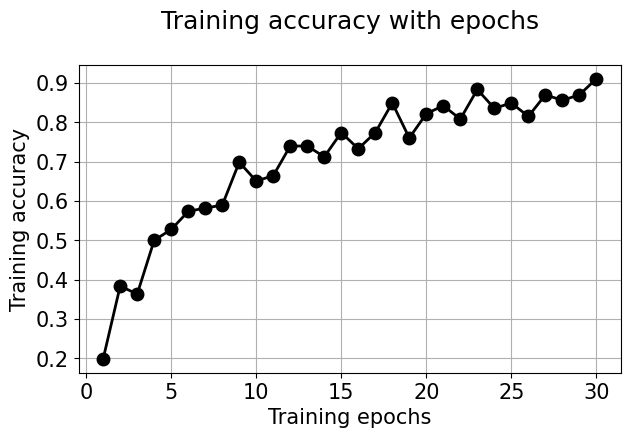

In [ ]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
model.save(filepath="save_model/")
model.save('my_model2')

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('my_model')
tflite_model = converter.convert()
with open("soil.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
model.save_weights("model_weights.h5.2")

In [ ]:
#  tf.keras.models.save_model(model, filepath="save_model/save_model")